/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


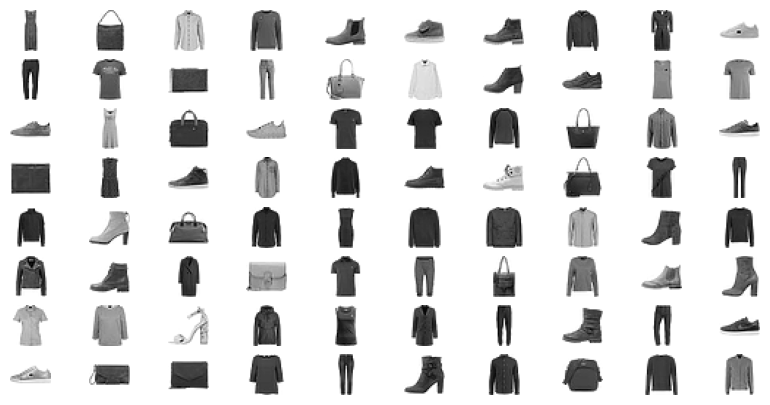

In [ ]:
#LUIS ANDRES MAMANI BURGOS


# Segun el data set me toco el clasico fasion -mnist no utilize en ninguno otro cuadernillo
from sklearn.datasets import fetch_openml
import numpy as np

# Cargar el conjunto de datos mediante una importacion  para guardarlas y convertir las etiquetas a números
mnist = fetch_openml('Fashion-MNIST', version=1)
mnist.target = mnist.target.astype(np.int64)

#utilizo sklearn la libreria
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

#Usare kmaeas para este dataset por el cual
#por lo cual importo
from sklearn.cluster import KMeans
k = 80  # Número de clústeres

#creo mi kameans con numero de clasters y una raiz
kmeans = KMeans(n_clusters=k, random_state=42)

#uso fit_transform  para que me devuelva mediante la matriz
#y me diga q tal lejos esta estas X_Train de los centroides
X_digits_dist = kmeans.fit_transform(X_train)

#aplico np.argmin que debuelve un indice con los datos mas cercanos
#al centroide
idxs = np.argmin(X_digits_dist, axis=0)

#contiene los datosmas  representaticvas que estan mas sercanas al claster
X_representative_digits = X_train.values[idxs]
#para graficar
import matplotlib.pyplot as plt #visualiza



plt.figure(figsize=(10, 5))

 # itera sobre las imagens mas representativas
for index, X_representative_digit in enumerate(X_representative_digits):
  #creouna grafica de 8 filas 10 columnas
    plt.subplot(8, 10, index+1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary")
    plt.axis('off')
plt.show()






#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#df = pd.read_csv('/content/drive/MyDrive/segundoparcial/Fasion-mnist.csv')


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_representative_digits = y_train.values[idxs]
# contiene las respuestas o las y  :V   uqe utiliza idxs  para saber a que cluster pertences

In [ ]:
#creo una regresion logistica para ver
from sklearn.linear_model import LogisticRegression

#haora mediantes esta regresion logisica ajustare con datos de entrenamiento
#tato x como y
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
#uso time para ver cuanto tiempo tarda en ejecutarse
%time log_reg2.fit(X_representative_digits, y_representative_digits)
#uso score para medir la presision
log_reg2.score(X_test, y_test)

CPU times: user 378 ms, sys: 505 ms, total: 883 ms
Wall time: 697 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6671428571428571

In [ ]:
#esta ves solo en la primeras 3000 filas para ver
#solo es ejemplo
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:3000], y_train[:3000])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 2min 16s, sys: 24 s, total: 2min 40s
Wall time: 1min 34s


0.7575428571428572

In [ ]:
#Usare una porpapagacion para generar
y_train_propagated = np.empty(len(X_train))
for i in range(k):#se itera sobre los cluster generados
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]  #i array boleano que indican qu muestras pertencen al cluster

  log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])

log_reg3.score(X_test, y_test)#

CPU times: user 9.42 s, sys: 5.03 s, total: 14.5 s
Wall time: 12.9 s


0.6347428571428572

zzzzzzzzzzzzzzzz


zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

DE Aqui adelante es entra para verificar algunas cosas


In [ ]:
###El aprendizaje activo (o *Active Learning*)
# Asumiendo que sorted_ixs debe ser una lista de índices ordenados en función de alguna métrica de 'problema'
import numpy as np

# Probas: probabilidades predichas
probas = log_reg3.predict_proba(X_train[:1000])

# Obtener los índices de las etiquetas predichas
labels_ixs = np.argmax(probas, axis=1)

# Obtener las probabilidades correspondientes a las etiquetas predichas
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])

# Ordenar las muestras por las probabilidades de las etiquetas predichas (suponiendo que 'problema' se refiere a esto)
sorted_ixs = np.argsort(labels)[::-1]

# Seleccionar las 10 muestras con mayor probabilidad
sorted_labels = labels[sorted_ixs[:10]]

print(sorted_labels)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


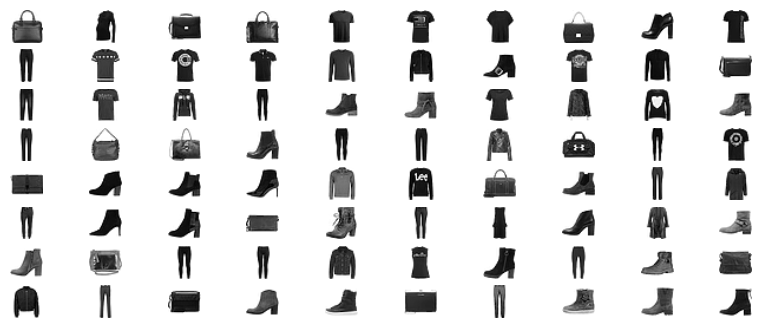

In [ ]:

X_lowest = X_train.values[:1000][sorted_ixs[:k]]#seleciona las primeras 1000 filas del enetrenamiento
plt.figure(figsize=(10, 4))#gradcio 10 de aqncho y 4 de alto
for index, img in enumerate(X_lowest):#itera sobre cada imagen
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")#muestra la imagen
    plt.axis('off')
plt.show()

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: user 7.02 s, sys: 2.8 s, total: 9.82 s
Wall time: 7.06 s


0.6562285714285714

2 ocpcion
